In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target  # Median house value in $100k

In [3]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [31]:
# Explain the variables in the fetch_california_housing dataset
print("""
- MedInc: Median income in block group
- HouseAge: Median house age in block group
- AveRooms: Average number of rooms per household
- AveBedrms: Average number of bedrooms per household
- Population: Block group population
- AveOccup: Average number of household members
- Latitude: Block group latitude
- Longitude: Block group longitude
""")
# Explain the target variable
print("Target variable (MedHouseVal): Median house value in block group (in $100k)")


- MedInc: Median income in block group
- HouseAge: Median house age in block group
- AveRooms: Average number of rooms per household
- AveBedrms: Average number of bedrooms per household
- Population: Block group population
- AveOccup: Average number of household members
- Latitude: Block group latitude
- Longitude: Block group longitude

Target variable (MedHouseVal): Median house value in block group (in $100k)


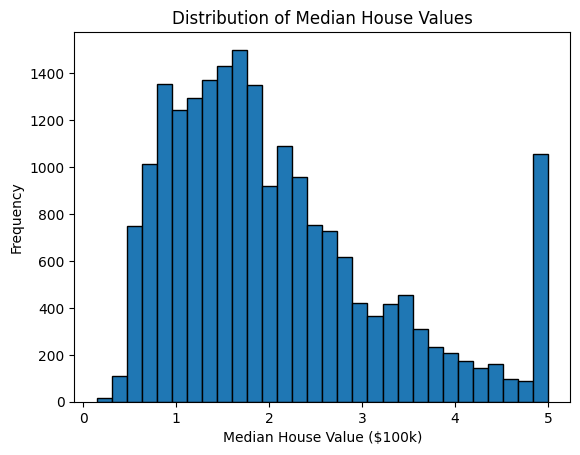

In [4]:
# plot the y variables
plt.hist(y, bins=30, edgecolor='k')
plt.xlabel('Median House Value ($100k)')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Values')
plt.show()

In [5]:
# TODO 1: Fit baseline linear regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

baseline_model = LinearRegression()
baseline_model.fit(X_scaled, y)
y_pred_baseline = baseline_model.predict(X_scaled)

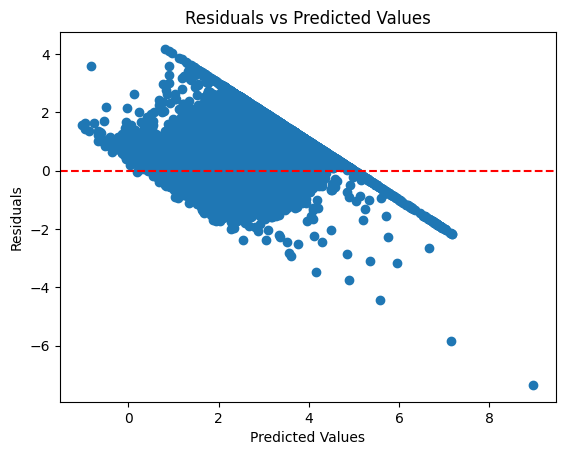

In [6]:
# TODO 2: Create residual plot (residuals vs predicted values)
residuals = y - y_pred_baseline
plt.scatter(y_pred_baseline, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

There seems to be a pattern for the residuals where it gets more negative as the higher the predicted values are

In [7]:
# TODO 3: Apply log transformation to y
y_transformed = np.log1p(y)

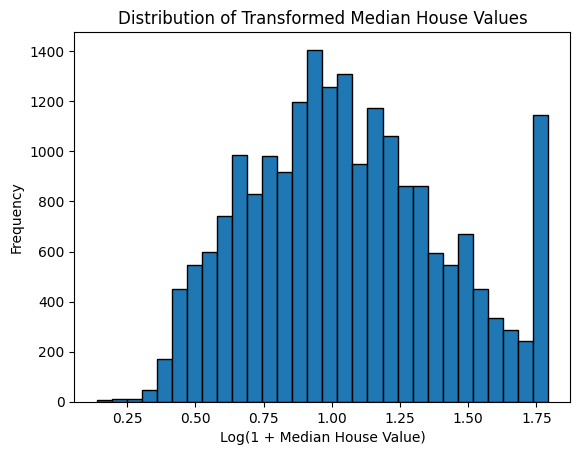

In [8]:
# look at the distribution of transformed y
plt.hist(y_transformed, bins=30, edgecolor='k')
plt.xlabel('Log(1 + Median House Value)')
plt.ylabel('Frequency')
plt.title('Distribution of Transformed Median House Values')
plt.show()

In [9]:
# TODO 4: Refit model with transformed y
model_transformed = LinearRegression()
model_transformed.fit(X_scaled, y_transformed)
y_pred_transformed = model_transformed.predict(X_scaled)

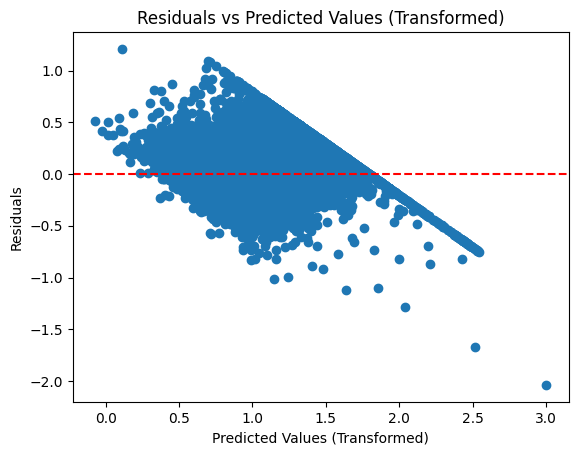

In [10]:
# TODO 5: Create residual plot for transformed model
residuals = y_transformed - y_pred_transformed
plt.scatter(y_pred_transformed, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values (Transformed)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Transformed)')
plt.show()

Residuals are more scattered but there still seems to be a pattern, but less so pronounced compared to the previous residual plot

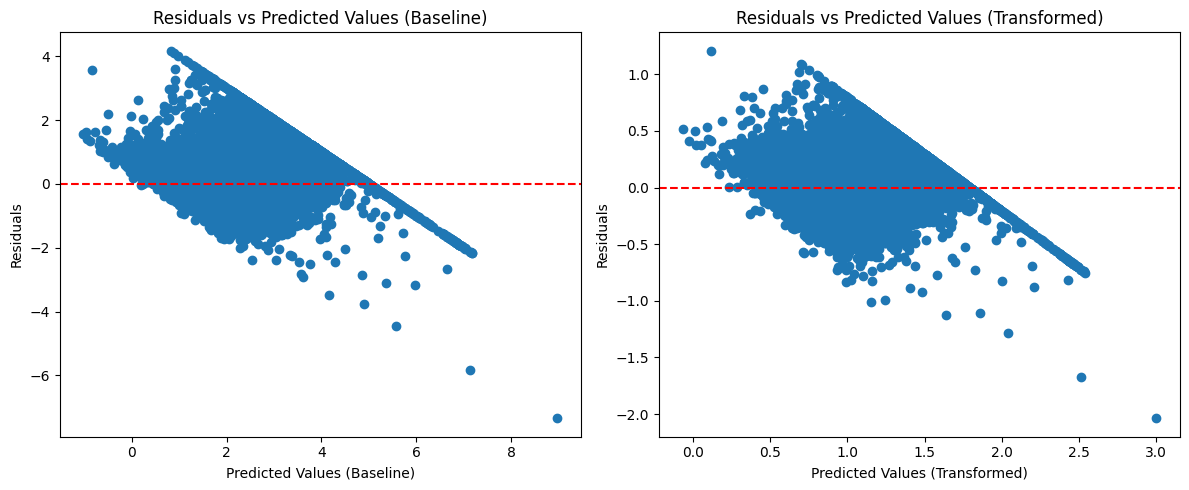

In [11]:
# TODO 6: Compare the two residual plots side-by-side
plt.figure(figsize=(12, 5))
# First plot: Baseline model residuals
plt.subplot(1, 2, 1)
plt.scatter(y_pred_baseline, y - y_pred_baseline)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values (Baseline)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Baseline)')
# Second plot: Transformed model residuals
plt.subplot(1, 2, 2)
plt.scatter(y_pred_transformed, y_transformed - y_pred_transformed)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values (Transformed)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Transformed)')
plt.tight_layout()
plt.show()

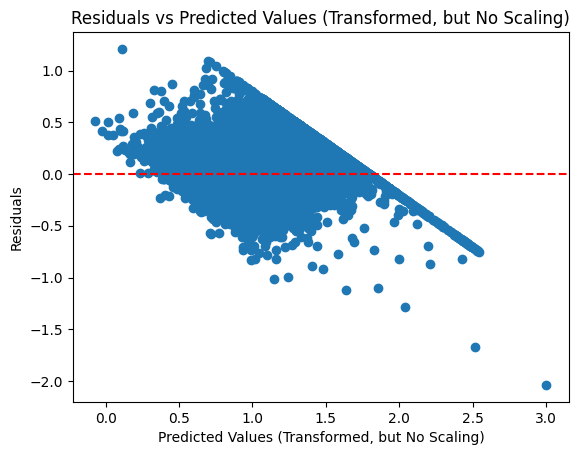

In [12]:
# fitting a model without scaling the features but using the transformed target variable
model_no_scaling = LinearRegression()
model_no_scaling.fit(X, y_transformed)
y_pred_no_scaling = model_no_scaling.predict(X)
# create the residual plot
residuals_no_scaling = y_transformed - y_pred_no_scaling
plt.scatter(y_pred_no_scaling, residuals_no_scaling)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values (Transformed, but No Scaling)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Transformed, but No Scaling)')
plt.show()


In [13]:
# Calculate the R squared values for all three models
r2_baseline = baseline_model.score(X_scaled, y)
r2_transformed = model_transformed.score(X_scaled, y_transformed)
r2_no_scaling = model_no_scaling.score(X, y_transformed)    
print(f'R^2 Baseline Model: {r2_baseline:.4f}')
print(f'R^2 Transformed Model: {r2_transformed:.4f}')
print(f'R^2 No Scaling Model: {r2_no_scaling:.4f}')
# Based on the R squared values, the transformed model with scaling performs the best, followed by the no scaling model, and then the baseline model. This indicates that applying a log transformation to the target variable improves the model's performance, and scaling the features further enhances it.
# The residual plots also show that the transformed model has a more random scatter of residuals around zero, indicating a better fit compared to the baseline model, which exhibited a clear pattern in the residuals.
# But note that the residual plot of the transformed model did not change much compared to the non-transformed model. This suggests that while the log transformation improved the model's performance in terms of R squared, it did not significantly alter the pattern of residuals. 
# Further investigation or alternative transformations might be needed to achieve a more random distribution of residuals.

R^2 Baseline Model: 0.6062
R^2 Transformed Model: 0.6231
R^2 No Scaling Model: 0.6231


In [14]:
# Bonus: Calculate a heteroscedasticity test statistic
def breusch_pagan_test(residuals, X):
    from statsmodels.stats.diagnostic import het_breuschpagan
    import statsmodels.api as sm

    X_with_const = sm.add_constant(X)
    lm_stat, lm_pvalue, f_stat, f_pvalue = het_breuschpagan(residuals, X_with_const)
    return lm_stat, lm_pvalue, f_stat, f_pvalue

lm_stat_baseline, lm_pvalue_baseline, f_stat_baseline, f_pvalue_baseline = breusch_pagan_test(y - y_pred_baseline, X_scaled)
lm_stat_transformed, lm_pvalue_transformed, f_stat_transformed, f_pvalue_transformed = breusch_pagan_test(y - y_pred_transformed, X_scaled)
print(f"Baseline Model - LM p-value: {lm_pvalue_baseline}, F p-value: {f_pvalue_baseline}")
print(f"Transformed Model - LM p-value: {lm_pvalue_transformed}, F p-value: {f_pvalue_transformed}")

Baseline Model - LM p-value: 0.0, F p-value: 0.0
Transformed Model - LM p-value: 0.0, F p-value: 0.0


Use the box-cox method to normalize the target variable as much as we can

In [15]:
from scipy.stats import boxcox
import numpy as np

# Your housing data
y = housing.target

# Box-Cox finds optimal λ
y_boxcox, lambda_optimal = boxcox(y)

print(f"Optimal λ: {lambda_optimal}")

# What it means:
# λ close to 0 → log-like transformation needed
# λ close to 0.5 → sqrt transformation needed  
# λ close to 1 → minimal transformation needed

print("""
### Visual Intuition:
Think of Box-Cox as a dial you turn:

λ = -1      λ = 0       λ = 0.5      λ = 1       λ = 2
  |          |            |           |           |
Inverse    Log         Sqrt      Original    Square
<---- Stronger compression    |    Weaker ---->""")

Optimal λ: 0.12474766404101849

### Visual Intuition:
Think of Box-Cox as a dial you turn:

λ = -1      λ = 0       λ = 0.5      λ = 1       λ = 2
  |          |            |           |           |
Inverse    Log         Sqrt      Original    Square
<---- Stronger compression    |    Weaker ---->


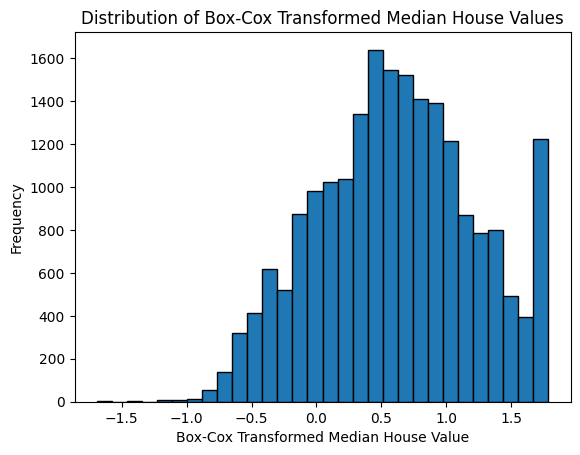

In [16]:
# plot the y_transformed
plt.hist(y_boxcox, bins=30, edgecolor='k')
plt.xlabel('Box-Cox Transformed Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Box-Cox Transformed Median House Values')
plt.show()

Optimal lambda: 0.125
→ Square root transformation appropriate


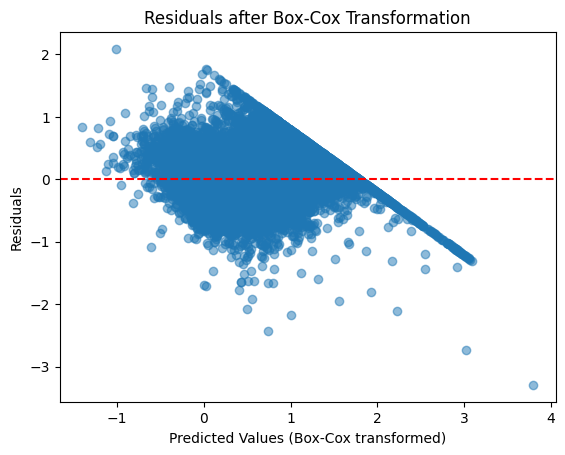

In [17]:
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Apply Box-Cox
y_boxcox, optimal_lambda = boxcox(housing.target)

print(f"Optimal lambda: {optimal_lambda:.3f}")

# Interpretation guide:
if optimal_lambda < -0.5:
    print("→ Strong inverse transformation needed")
elif optimal_lambda < 0.1:
    print("→ Log transformation appropriate")
elif optimal_lambda < 0.7:
    print("→ Square root transformation appropriate")
else:
    print("→ Minimal/no transformation needed")

# Now fit model with Box-Cox transformed y
model_boxcox = LinearRegression().fit(X_scaled, y_boxcox)
residuals_boxcox = y_boxcox - model_boxcox.predict(X_scaled)


# Plot residuals
plt.scatter(model_boxcox.predict(X_scaled), residuals_boxcox, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values (Box-Cox transformed)')
plt.ylabel('Residuals')
plt.title('Residuals after Box-Cox Transformation')
plt.show()

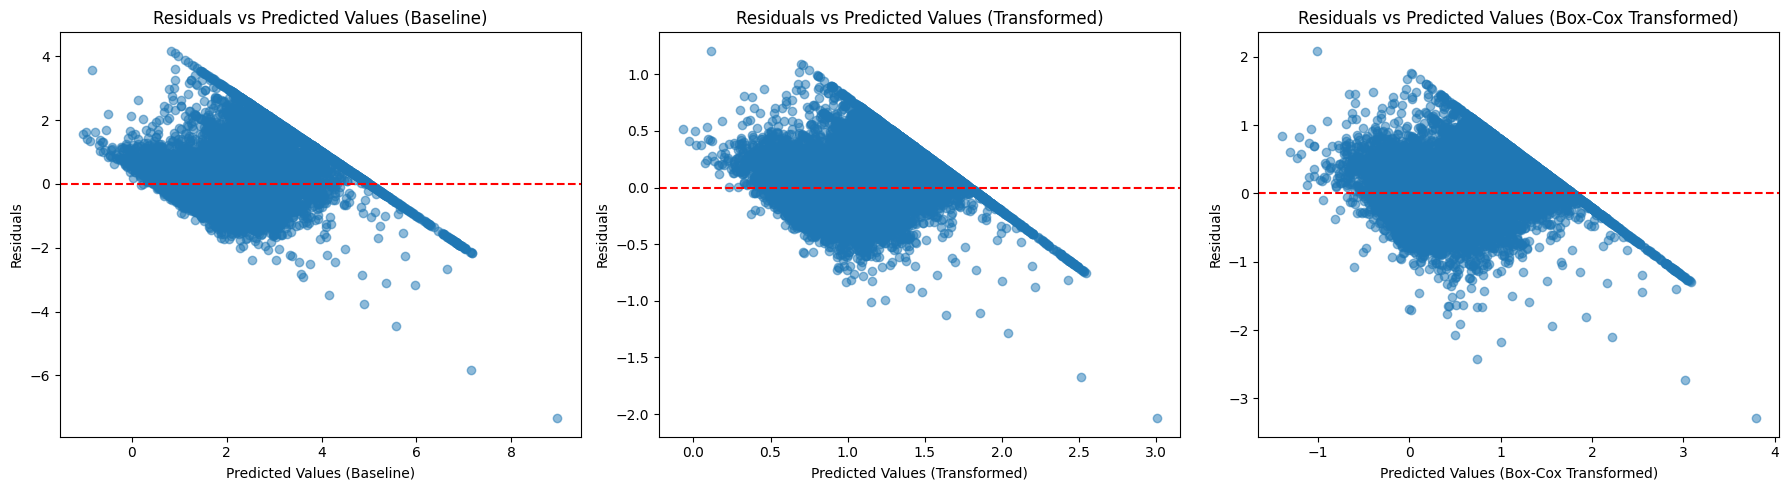

In [18]:
# create the 3 residual plots of the three models side by side
plt.figure(figsize=(18, 5))
# Baseline model
plt.subplot(1, 3, 1)
plt.scatter(y_pred_baseline, y - y_pred_baseline, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values (Baseline)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Baseline)')

# Transformed model
plt.subplot(1, 3, 2)
plt.scatter(y_pred_transformed, y_transformed - y_pred_transformed, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values (Transformed)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Transformed)')

# Box-Cox model
plt.subplot(1, 3, 3)
plt.scatter(model_boxcox.predict(X_scaled), residuals_boxcox, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values (Box-Cox Transformed)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Box-Cox Transformed)')
plt.tight_layout()
plt.show()


In [19]:
# run the Breusch-Pagan test on all 3 models
lm_stat_baseline, lm_pvalue_baseline, f_stat_baseline, f_pvalue_baseline = breusch_pagan_test(y - y_pred_baseline, X_scaled)
lm_stat_transformed, lm_pvalue_transformed, f_stat_transformed, f_pvalue_transformed = breusch_pagan_test(y_transformed - y_pred_transformed, X_scaled)
lm_stat_boxcox, lm_pvalue_boxcox, f_stat_boxcox, f_pvalue_boxcox = breusch_pagan_test(residuals_boxcox, X_scaled)
print(f"Baseline Model - LM p-value: {lm_pvalue_baseline}, F p-value: {f_pvalue_baseline}")
print(f"Transformed Model - LM p-value: {lm_pvalue_transformed}, F p-value: {f_pvalue_transformed}")
print(f"Box-Cox Model - LM p-value: {lm_pvalue_boxcox}, F p-value: {f_pvalue_boxcox}")

Baseline Model - LM p-value: 0.0, F p-value: 0.0
Transformed Model - LM p-value: 0.0, F p-value: 0.0
Box-Cox Model - LM p-value: 0.0, F p-value: 0.0


## Final Exercise

In [28]:
# 1. Fit log model with robust SE
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
import pandas as pd

X = pd.DataFrame(housing.data, columns=housing.feature_names)

X_const = sm.add_constant(X)
y_log = np.log1p(housing.target)
model = OLS(y_log, X_const).fit()
robust = model.get_robustcov_results(cov_type='HC3')

# Get index of MedInc
idx = list(housing.feature_names).index('MedInc') + 1  # +1 for constant

# 2. Compare standard vs robust SE
print("MedInc coefficient:", model.params['MedInc'])
print("Standard SE:", model.bse['MedInc'])
print("Robust SE:", robust.bse[idx]) #robust only takes integers
print("Standard p-value:", model.pvalues['MedInc'])
print("Robust p-value:", robust.pvalues[idx])

# 3. Interpret: Did any conclusions change?

MedInc coefficient: 0.12476520085831738
Standard SE: 0.0012674591727164825
Robust SE: 0.003137946586618671
Standard p-value: 0.0
Robust p-value: 0.0


In [32]:
model.pvalues

const         0.000000e+00
MedInc        0.000000e+00
HouseAge      2.508931e-50
AveRooms      7.054179e-47
AveBedrms     4.944700e-86
Population    7.339889e-02
AveOccup      5.267853e-14
Latitude      0.000000e+00
Longitude     0.000000e+00
dtype: float64

In [33]:
robust.pvalues

array([0.00000000e+00, 0.00000000e+00, 2.63135930e-36, 1.69125239e-07,
       1.72219879e-05, 8.29523902e-02, 1.19912975e-01, 0.00000000e+00,
       0.00000000e+00])

### Post Results Reflection

1. Are the robust SE larger or smaller than standard SE? <br>
    Seems that the robust SE > standard SE.
2. Why do you think that is? <br>
    This is because due to heteroscedasticity, the standard error given by the model is usually under reported, hence the robust SE corrects this.
3. Did any variable's significance change? <br>
    All variables are still significant, but the significance / p- value of the robust SE is larger than the standard SE.
4. What would you tell a stakeholder about the MedInc coefficient? <br>
    A one-unit increase in median income (in $10k) is associated with approximately a 13% increase in median house value, holding other factors constant.